Aim of the project: Buying House 
Client: Erin Robinson

Request: "Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible"

Data Table created in DBeaver with the following command:

SELECT
	t2.price,
	t1.*,
	t2.date
FROM
	king_county_house_details t1
LEFT JOIN king_county_house_sales t2
ON
	t1.id = t2.house_id

Next Step is to analyze the .csv results, cleaning and determinate the correlations

In [35]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df_houses=pd.read_csv("./data/DATA_EDA_project.csv")
df_houses

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,...,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13
1,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,...,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09
2,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,...,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25
3,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,...,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09
4,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,...,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,...,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21
21593,400000.000,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,...,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23
21594,402101.000,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,...,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23
21595,400000.000,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,...,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16


In [36]:
df_houses.info() # to get information regarding the type of data in each column. date should be changed in date format in order to be analyzed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   id             21597 non-null  int64  
 2   bedrooms       21597 non-null  float64
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  float64
 5   sqft_lot       21597 non-null  float64
 6   floors         21597 non-null  float64
 7   waterfront     19206 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  float64
 12  sqft_basement  21145 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17749 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [37]:
# change date in the dedicated format type
df_houses['date']=pd.to_datetime(df_houses['date'], format='%Y-%m-%d')

In [38]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          21597 non-null  float64       
 1   id             21597 non-null  int64         
 2   bedrooms       21597 non-null  float64       
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  float64       
 5   sqft_lot       21597 non-null  float64       
 6   floors         21597 non-null  float64       
 7   waterfront     19206 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  float64       
 12  sqft_basement  21145 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17749 non-null  float64       
 15  zipcode        2159

Date string as been converted in date forma. Now we should check for consistency in the data column

In [39]:
df_houses.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,...,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597
mean,540296.574,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,...,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512
min,78000.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00
25%,322000.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00
50%,450000.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,...,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00
75%,645000.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,...,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00
max,7700000.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,...,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00
std,367368.140,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,...,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN


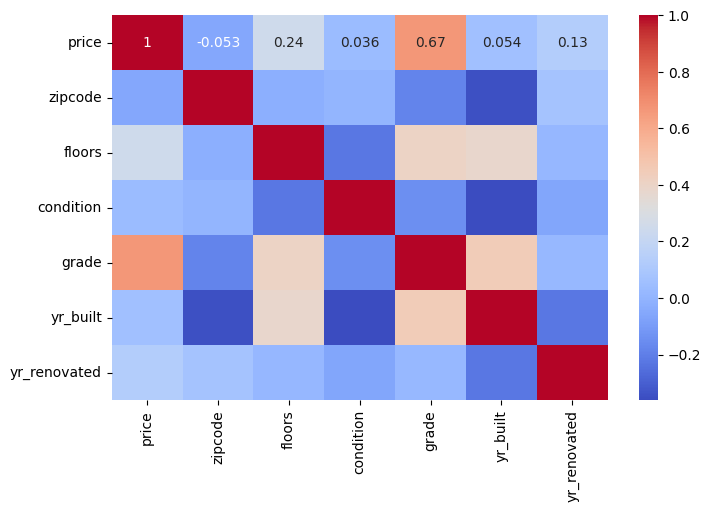

In [55]:
#'hypothesis'
df_price_zipcode=df_houses[['price','zipcode','floors','condition','grade','yr_built','yr_renovated']]

# Plot heatmap
sns.heatmap(df_price_zipcode.corr(), annot=True, cmap='coolwarm')
plt.show()


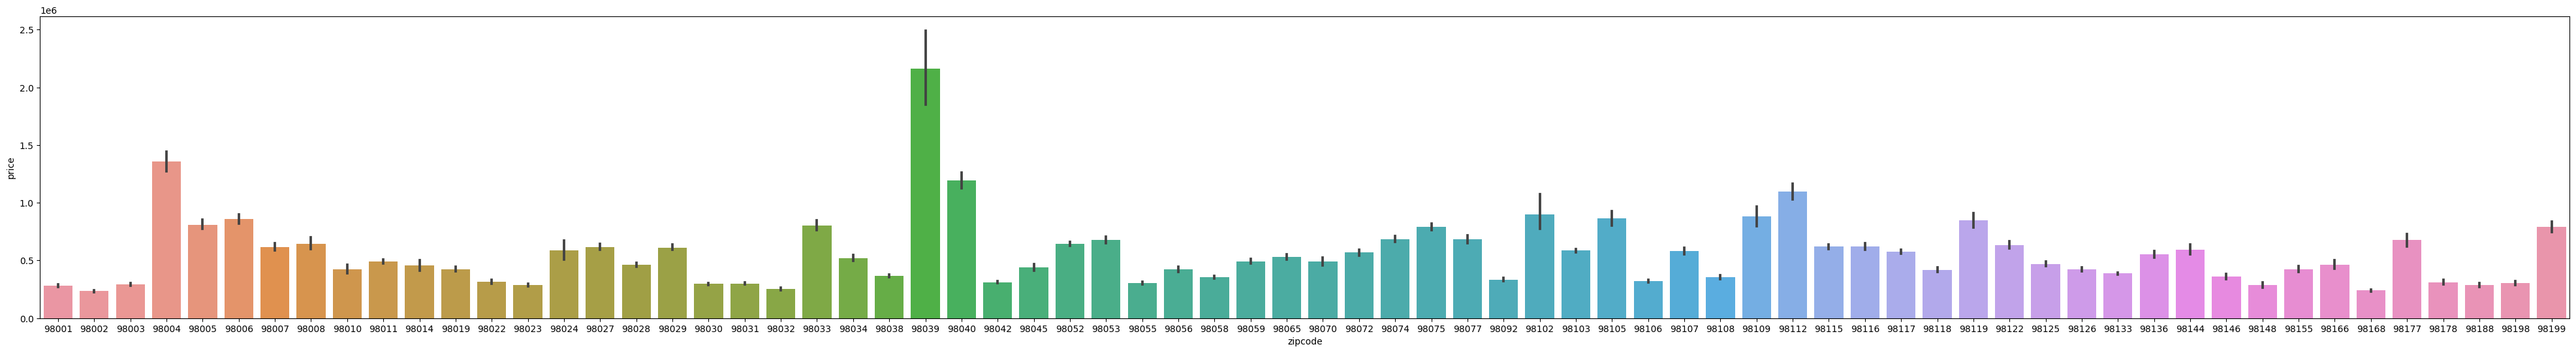

In [65]:
plt.figure(figsize=(50, 6))  # Width=12, Height=6 in inches
sns.barplot(df_houses, x='zipcode', y='price')
plt.show()


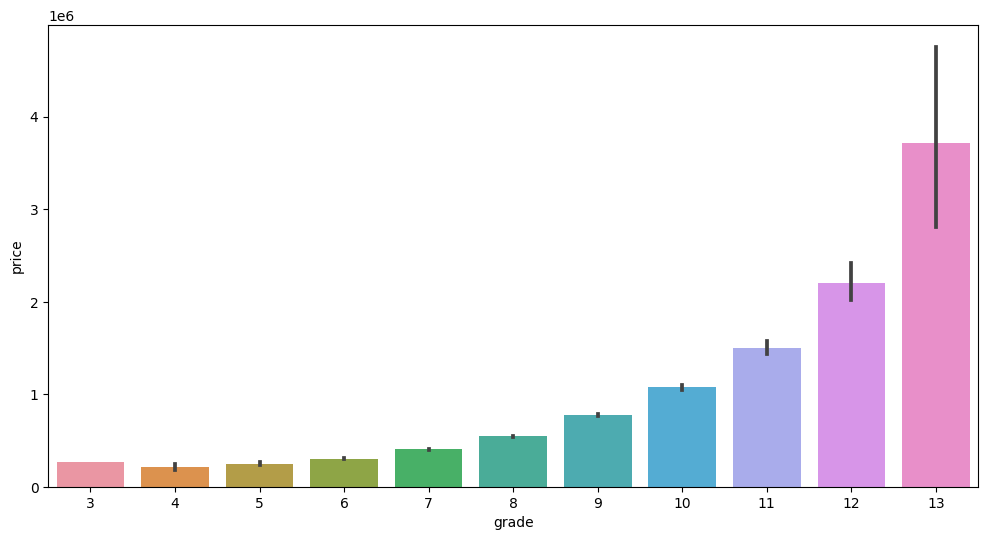

In [81]:
plt.figure(figsize=(12, 6))  # Width=12, Height=6 in inches
sns.barplot(df_houses, x='grade', y='price')
plt.show()

For this analysis the houses with a grade lower than 7 should be considered

In [71]:
df_poor=df_houses[df_houses['price']<500000]
df_poor

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.000,7129300520,3,1,1180.000,5650.000,1,NaN,0,3,...,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13
2,180000.000,5631500400,2,1,770.000,10000.000,1,0.000,0,3,...,770.000,0.000,1933,<NA>,98028,47.738,-122.233,2720.000,8062.000,2015-02-25
6,257500.000,1321400060,3,2,1715.000,6819.000,2,0.000,0,3,...,1715.000,NaN,1995,0,98003,47.310,-122.327,2238.000,6819.000,2014-06-27
7,291850.000,2008000270,3,2,1060.000,9711.000,1,0.000,<NA>,3,...,1060.000,0.000,1963,0,98198,47.410,-122.315,1650.000,9711.000,2015-01-15
8,229500.000,2414600126,3,1,1780.000,7470.000,1,0.000,0,3,...,1050.000,730.000,1960,0,98146,47.512,-122.337,1780.000,8113.000,2015-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000,263000018,3,2,1530.000,1131.000,3,0.000,0,3,...,1530.000,0.000,2009,0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21
21593,400000.000,6600060120,4,2,2310.000,5813.000,2,0.000,0,3,...,2310.000,0.000,2014,0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23
21594,402101.000,1523300141,2,1,1020.000,1350.000,2,0.000,0,3,...,1020.000,0.000,2009,0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23
21595,400000.000,291310100,3,2,1600.000,2388.000,2,NaN,0,3,...,1600.000,0.000,2004,0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16


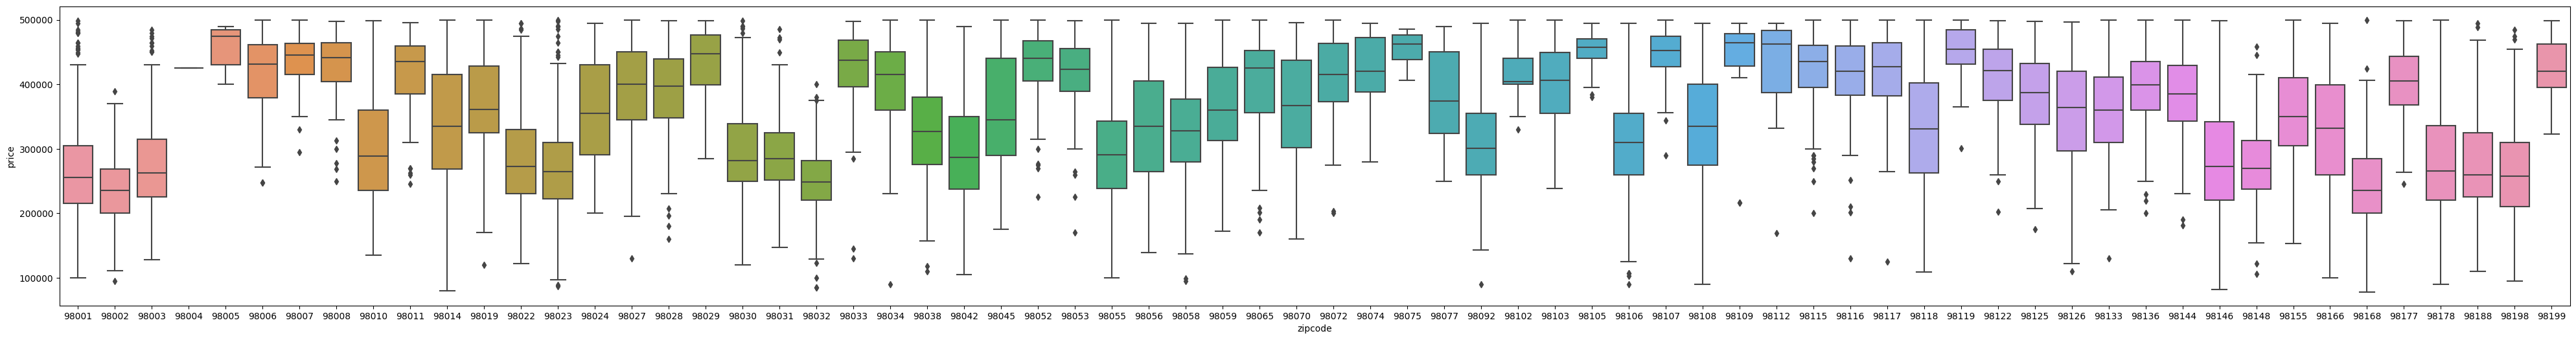

In [75]:
plt.figure(figsize=(50, 6))  # Width=12, Height=6 in inches
sns.boxplot(df_poor, x='zipcode', y='price')
plt.show()

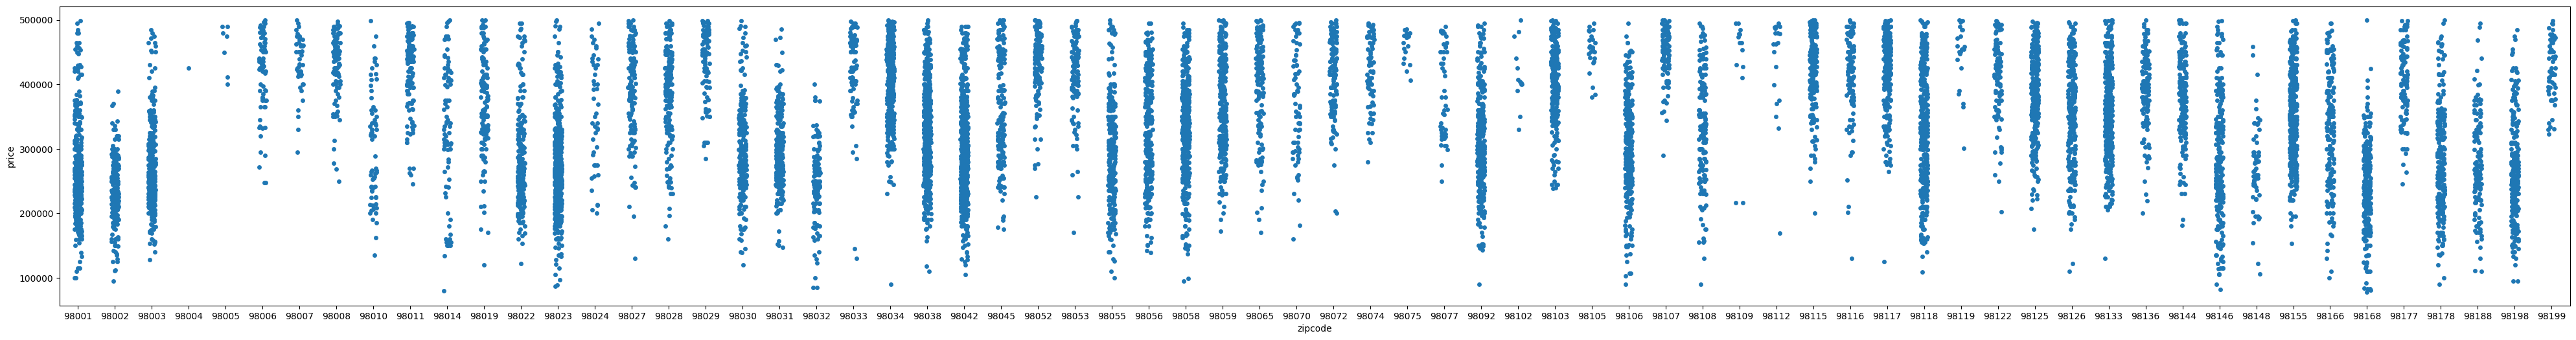

In [76]:
plt.figure(figsize=(50, 6))  # Width=12, Height=6 in inches
sns.stripplot(df_poor, x='zipcode', y='price')
plt.show()

Cleaning

In [40]:
#Bedrooms, bathrooms, floors, views, renovated year are supposed to be integer number
# let's consider the floor level, it should be an integer
df_houses['bathrooms'] = df_houses['bathrooms'].round().astype('Int64')
df_houses['bedrooms'] = df_houses['bedrooms'].round().astype('Int64')
df_houses['floors'] = df_houses['floors'].round().astype('Int64')
df_houses['view'] = df_houses['view'].round().astype('Int64')
df_houses['yr_renovated'] = df_houses['yr_renovated'].round().astype('Int64')
df_houses


,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.000,7129300520,3,1,1180.000,5650.000,1,NaN,0,3,...,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13
1,538000.000,6414100192,3,2,2570.000,7242.000,2,0.000,0,3,...,2170.000,400.000,1951,19910,98125,47.721,-122.319,1690.000,7639.000,2014-12-09
2,180000.000,5631500400,2,1,770.000,10000.000,1,0.000,0,3,...,770.000,0.000,1933,<NA>,98028,47.738,-122.233,2720.000,8062.000,2015-02-25
3,604000.000,2487200875,4,3,1960.000,5000.000,1,0.000,0,5,...,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09
4,510000.000,1954400510,3,2,1680.000,8080.000,1,0.000,0,3,...,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000,263000018,3,2,1530.000,1131.000,3,0.000,0,3,...,1530.000,0.000,2009,0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21
21593,400000.000,6600060120,4,2,2310.000,5813.000,2,0.000,0,3,...,2310.000,0.000,2014,0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23
21594,402101.000,1523300141,2,1,1020.000,1350.000,2,0.000,0,3,...,1020.000,0.000,2009,0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23
21595,400000.000,291310100,3,2,1600.000,2388.000,2,NaN,0,3,...,1600.000,0.000,2004,0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16


In [41]:
df_houses.isna().sum()

price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
dtype: int64

In [ ]:
df_price_zipcode=df_houses['price','zipcode','floor','condition','grade']
sns.heatmap(df_price_zipcode.corr())

KeyError: ('price', 'zipcode', 'floor', 'condition')